In [1]:
import pandas as pd


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib.animation import FuncAnimation

from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn import metrics
from sklearn.metrics import r2_score
from seaborn import load_dataset 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
# Plot style
plt.style.use("seaborn-whitegrid")



In [2]:
PATH = "~/Downloads/titanic.csv"
df = pd.read_csv(PATH)
df.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [3]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# Filling missing data by using mode
df["age"]= df["age"].fillna(df["age"].mode()[0])

In [6]:
# Filling missing data by using mode

df["embarked"]= df["embarked"].fillna(df["embarked"].mode()[0])

In [7]:
#df["deck"]= df["deck"].dropna
df.drop(labels=['deck','embark_town','alive'],inplace=True,axis=1)

In [8]:
print(df.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


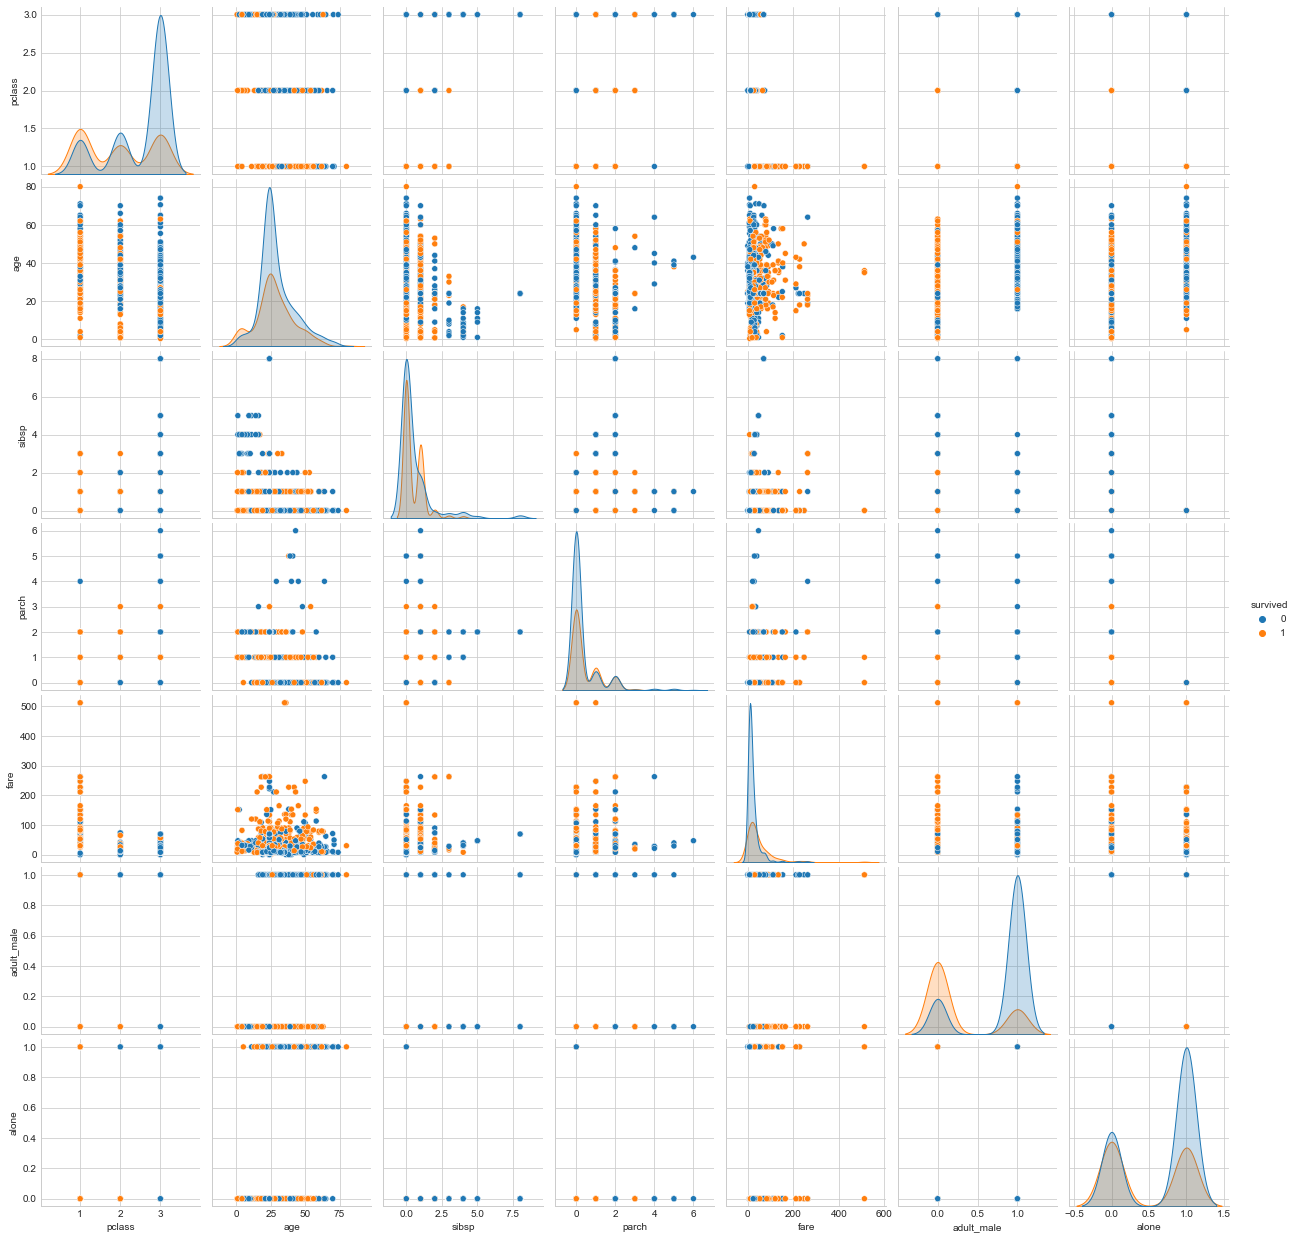

In [9]:
import seaborn as sns

sns.pairplot(data=df,hue='survived')

In [10]:
df.corr()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554,0.232281,0.151002
sibsp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.232281,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.151002,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [11]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554,0.232281,0.151002
sibsp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.232281,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.151002,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [12]:
df.sex.value_counts()


male      577
female    314
Name: sex, dtype: int64

In [13]:
df.who.value_counts()


man      537
woman    271
child     83
Name: who, dtype: int64

In [14]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [15]:
df['class'].map({'First': 0, 'Second': 1, 'Third': 2}).astype(int)

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Name: class, Length: 891, dtype: int32

In [16]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.052872,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.356187,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.052872,-0.356187,1.000000,-0.232411,-0.155118,0.107554,0.232281,0.151002
sibsp,-0.035322,0.083081,-0.232411,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.155118,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.107554,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.232281,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.151002,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [17]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alone'],
      dtype='object')

In [18]:
#basline
df["survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: survived, dtype: float64

In [19]:
#lets split
train,test=train_test_split(df,
                           train_size=0.7,
                           test_size=0.2,
                           random_state=42)

In [20]:
def cleaner(df):
    
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

# applying the function on both the training and validation sets
train_numeric = cleaner(train)
test_numeric = cleaner(test)

In [21]:
train_numeric

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
331,0,1,45.5,0,0,28.5000,True,True
733,0,2,23.0,0,0,13.0000,True,True
382,0,3,32.0,0,0,7.9250,True,True
704,0,3,26.0,1,0,7.8542,True,False
813,0,3,6.0,4,2,31.2750,False,False
...,...,...,...,...,...,...,...,...
461,0,3,34.0,0,0,8.0500,True,True
455,1,3,29.0,0,0,7.8958,True,True
887,1,1,19.0,0,0,30.0000,False,True
269,1,1,35.0,0,0,135.6333,False,True


In [22]:
test_numeric

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
709,1,3,24.0,1,1,15.2458,True,False
439,0,2,31.0,0,0,10.5000,True,True
840,0,3,20.0,0,0,7.9250,True,True
720,1,2,6.0,0,1,33.0000,False,False
39,1,3,14.0,1,0,11.2417,False,False
...,...,...,...,...,...,...,...,...
433,0,3,17.0,0,0,7.1250,True,True
773,0,3,24.0,0,0,7.2250,True,True
25,1,3,38.0,1,5,31.3875,False,False
84,1,2,17.0,0,0,10.5000,False,True


In [23]:
train["survived"].value_counts(normalize=True)

0    0.609952
1    0.390048
Name: survived, dtype: float64

In [24]:
# Create X, y train and validation sets

target = "survived"

# feature set --> everything except for price --> X_train
# target set/column --> price --> y_train

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_test = test_numeric.drop(target, axis=1)
y_test = test_numeric[target]

In [25]:
lr = LogisticRegression(solver='lbfgs',max_iter=1000)
lr.fit(X_train, y_train)

# This return the R^2 score --> we will cover this tomorrow
lr.score(X_test, y_test)

0.8044692737430168

In [26]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data --> only numeric columns 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Look at the transformed data
X_train_scaled[:5]

array([[-1.60304435,  1.27730332, -0.47688368, -0.49787853, -0.09589774,
         0.82142022,  0.83242704],
       [-0.39543053, -0.40293468, -0.47688368, -0.49787853, -0.38249177,
         0.82142022,  0.83242704],
       [ 0.81218329,  0.26916052, -0.47688368, -0.49787853, -0.47632821,
         0.82142022,  0.83242704],
       [ 0.81218329, -0.17890294,  0.34610394, -0.49787853, -0.47763729,
         0.82142022, -1.20130648],
       [ 0.81218329, -1.67244783,  2.81506681,  1.99351364, -0.04458816,
        -1.21740368, -1.20130648]])

In [27]:
lr_sc = LogisticRegression()
lr_sc.fit(X_train_scaled, y_train)

# This return the R^2 score --> we will cover this tomorrow
lr_sc.score(X_test_scaled, y_test)

0.8100558659217877

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# This return the R^2 score --> we will cover this tomorrow
lr.score(X_test, y_test)

0.4455799727952481

In [29]:
pd.concat([X_train, y_train], axis = 1)

,pclass,age,sibsp,parch,fare,adult_male,alone,survived
331,1,45.5,0,0,28.5000,True,True,0
733,2,23.0,0,0,13.0000,True,True,0
382,3,32.0,0,0,7.9250,True,True,0
704,3,26.0,1,0,7.8542,True,False,0
813,3,6.0,4,2,31.2750,False,False,0
...,...,...,...,...,...,...,...,...
461,3,34.0,0,0,8.0500,True,True,0
455,3,29.0,0,0,7.8958,True,True,1
887,1,19.0,0,0,30.0000,False,True,1
269,1,35.0,0,0,135.6333,False,True,1


In [30]:
# Calculates the cost functions
def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")

# The baseline model --> replace values by the mean and calculate the cost functions
# Baseline is concerned with the average value
b_preds = [y_train.mean() for x in range(len(y_train))]

res0 = calc_cost(y_train, b_preds)

print("\nLinear Regression")
res1 = calc_cost(y_train, lr.predict(X_train))

Baseline
MSE: 0.23791059158166486
MAE: 0.4758211831633297
RMSE: 0.4877607934035544

Linear Regression
MSE: 0.14163882075751447
MAE: 0.29214722282807404
RMSE: 0.3763493334091539


In [31]:
# Since the value is positive --> the regression model is better than the Baseline model

res0['MSE']-res1['MSE']

0.0962717708241504

In [32]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data --> only numeric columns 
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_test)

# Look at the transformed data
X_train_scaled[:5]

array([[-1.60304435,  1.27730332, -0.47688368, -0.49787853, -0.09589774,
         0.82142022,  0.83242704],
       [-0.39543053, -0.40293468, -0.47688368, -0.49787853, -0.38249177,
         0.82142022,  0.83242704],
       [ 0.81218329,  0.26916052, -0.47688368, -0.49787853, -0.47632821,
         0.82142022,  0.83242704],
       [ 0.81218329, -0.17890294,  0.34610394, -0.49787853, -0.47763729,
         0.82142022, -1.20130648],
       [ 0.81218329, -1.67244783,  2.81506681,  1.99351364, -0.04458816,
        -1.21740368, -1.20130648]])

In [34]:
# Train the model
lr2 = LinearRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_val_scaled, y_test)

0.4455799727952464

In [35]:
res2 = calc_cost(y_test, lr2.predict(X_test_scaled))

MSE: 0.13444785154586109
MAE: 0.2828940603861411
RMSE: 0.3666713126846182


In [36]:
res1

{'MSE': 0.14163882075751447,
 'MAE': 0.29214722282807404,
 'RMSE': 0.3763493334091539}

In [37]:
delta_1 = res0['MSE']-res1['MSE']
delta_2 = res1['MSE']-res2['MSE']

print(f'Difference between baseline and 1st model {round(delta_1)}')

print(f'Difference between 1st and 2nd model {round(delta_2)}')

Difference between baseline and 1st model 0
Difference between 1st and 2nd model 0


In [38]:
lr2.coef_

array([-0.10332057, -0.01441028, -0.09961647, -0.05568507,  0.03222184,
       -0.27321926, -0.04519444])

In [39]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6
count,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,3.576593e-16,-2.107285e-16,5.944950e-16,4.312584e-17,-1.835521e-17,-1.407827e-17,-1.475545e-16
std,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-1.603044e+00,-2.089147e+00,-4.768837e-01,-4.978785e-01,-6.228610e-01,-1.217404e+00,-1.201306e+00
25%,-3.954305e-01,-4.776119e-01,-4.768837e-01,-4.978785e-01,-4.763282e-01,-1.217404e+00,-1.201306e+00
50%,8.121833e-01,-3.282574e-01,-4.768837e-01,-4.978785e-01,-3.547569e-01,8.214202e-01,8.324270e-01
75%,8.121833e-01,4.931923e-01,3.461039e-01,7.478176e-01,-4.458816e-02,8.214202e-01,8.324270e-01
max,8.121833e-01,3.853668e+00,6.107017e+00,6.976298e+00,8.850074e+00,8.214202e-01,8.324270e-01


In [40]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_val_robust = scaler2.transform(X_test)

# Look at the transformed data
X_train_robust[:5]

array([[-2.        ,  1.65384615,  0.        ,  0.        ,  0.59957173,
         0.        ,  0.        ],
       [-1.        , -0.07692308,  0.        ,  0.        , -0.06423983,
         0.        ,  0.        ],
       [ 0.        ,  0.61538462,  0.        ,  0.        , -0.28158458,
         0.        ,  0.        ],
       [ 0.        ,  0.15384615,  1.        ,  0.        , -0.2846167 ,
         0.        , -1.        ],
       [ 0.        , -1.38461538,  4.        ,  2.        ,  0.71841542,
        -1.        , -1.        ]])

In [41]:
# Train the model
lr3 = LinearRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_val_robust, y_test)

0.4455799727952464

In [42]:
res3 = calc_cost(y_test, lr3.predict(X_val_robust))

MSE: 0.13444785154586109
MAE: 0.28289406038614107
RMSE: 0.3666713126846182


In [43]:
lr2.coef_

array([-0.10332057, -0.01441028, -0.09961647, -0.05568507,  0.03222184,
       -0.27321926, -0.04519444])

In [44]:
delta_1 = res0['MSE']-res1['MSE']
delta_2 = res1['MSE']-res2['MSE']
delta_3 = res2['MSE']-res3['MSE']

print(f'Difference between baseline and 1st model {round(delta_1)}')

print(f'Difference between 1st and 2nd model {round(delta_2)}')

# We did not get any improvements 
print(f'Difference between 2nd and 3rd model {round(delta_3)}')

Difference between baseline and 1st model 0
Difference between 1st and 2nd model 0
Difference between 2nd and 3rd model 0


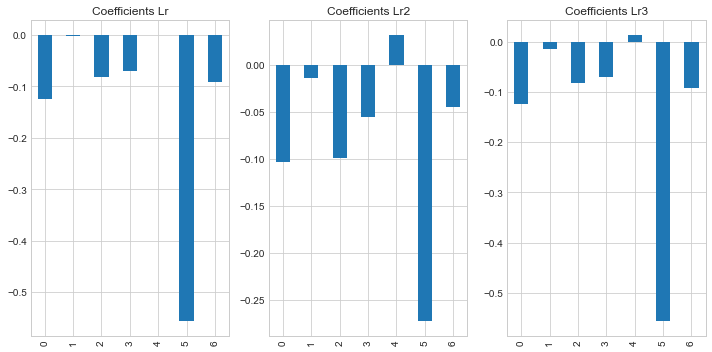

In [45]:
fig, ax = plt.subplots(1,3)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr", ax=ax[0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2", ax=ax[1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3", ax=ax[2], figsize=(10,5))
plt.tight_layout();

In [46]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_val_mm = scaler3.transform(X_test)

# Look at the transformed data
X_train_mm[:5]

array([[0.        , 0.56647399, 0.        , 0.        , 0.0556283 ,
        1.        , 1.        ],
       [0.5       , 0.28373963, 0.        , 0.        , 0.02537431,
        1.        , 1.        ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01546857,
        1.        , 1.        ],
       [1.        , 0.32143755, 0.125     , 0.        , 0.01533038,
        1.        , 0.        ],
       [1.        , 0.07011812, 0.5       , 0.33333333, 0.06104473,
        0.        , 0.        ]])

In [47]:
# Train the model
lr4 = LinearRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_val_mm, y_test)

0.44557997279524664

In [48]:
res4 = calc_cost(y_test, lr4.predict(X_val_mm))

MSE: 0.13444785154586103
MAE: 0.282894060386141
RMSE: 0.36667131268461817


In [49]:
lr4.coef_

array([-0.2495427 , -0.08563762, -0.65586495, -0.41620006,  0.3052354 ,
       -0.55704595, -0.09191344])

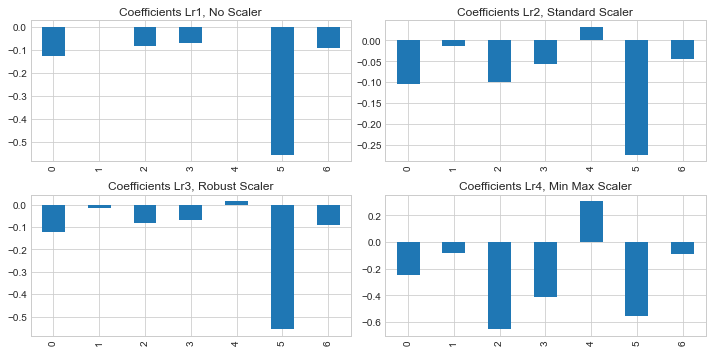

In [50]:
fig, ax = plt.subplots(2,2)

pd.Series(lr.coef_).plot(kind="bar", title="Coefficients Lr1, No Scaler", ax=ax[0,0])
pd.Series(lr2.coef_).plot(kind="bar", title="Coefficients Lr2, Standard Scaler", ax=ax[0,1])
pd.Series(lr3.coef_).plot(kind="bar", title="Coefficients Lr3, Robust Scaler", ax=ax[1,0])
pd.Series(lr4.coef_).plot(kind="bar", title="Coefficients Lr4, Min Max Scaler", ax=ax[1,1], figsize=(10,5))

plt.tight_layout();

In [51]:
PATH1 = "~/Downloads/titanic.csv"
df2 = pd.read_csv(PATH1)
df2.head(20)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [52]:
train,test=train_test_split(
df2,
    train_size=0.8,
    test_size=0.2,
    random_state=42
)

In [53]:
age_mean_train=round(train["age"].mean())
train["age"].fillna(age_mean_train,inplace=True)
age_mean_test=round(test["age"].mean())
test["age"].fillna(age_mean_test,inplace=True)
cols=["deck","embark_town","embarked"]
train[cols]=train[cols].fillna(train.mode().iloc[0])
test[cols]=test[cols].fillna(test.mode().iloc[0])
                                         

C:\Users\iand9\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\iand9\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
train.describe(exclude="number")

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,712,712,712,712,712,712,712,712,712
unique,2,3,3,3,2,7,3,2,2
top,male,S,Third,man,True,C,Southampton,no,True
freq,467,527,398,432,432,606,527,444,429


In [55]:


# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["sex", "embarked","class","who","deck","embark_town","alive"]

# One Hot encode the column in both the train and validation sets
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()

one_hot_df_val = one_hot.transform(test[col_names]).toarray()

In [56]:
# Look at the categories
one_hot.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['First', 'Second', 'Third'], dtype=object),
 array(['child', 'man', 'woman'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [57]:
one_hot_df

array([[0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.]])

In [58]:
one_hot_df_val

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 1., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.]])

In [59]:
col_names

['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'alive']

In [60]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(f"{col_names[y]}"+"_"+f"{one_hot.categories_[y][z]}")


column_names

['sex_female',
 'sex_male',
 'embarked_C',
 'embarked_Q',
 'embarked_S',
 'class_First',
 'class_Second',
 'class_Third',
 'who_child',
 'who_man',
 'who_woman',
 'deck_A',
 'deck_B',
 'deck_C',
 'deck_D',
 'deck_E',
 'deck_F',
 'deck_G',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton',
 'alive_no',
 'alive_yes']

In [61]:
def col_names(one_hot_model):
    "Create columns names list for one hot encoded feature"
    column_names = []
    col_names = ["sex", "embarked","class","who","deck","embark_town","alive"]
    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(f"{col_names[y]}"+"_"+f"{one_hot_model.categories_[y][z]}")
            
    return column_names

column_names = col_names(one_hot)

In [62]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=test.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(712, 23)
(179, 23)


In [63]:
# Create train_new df by merging train and one hot encoded df together and drop color and clarity cols

train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["sex", "embarked","class","who","deck","embark_town","alive"], axis=1)
val_new = test.merge(oh_df_val, on=test.index).set_index("key_0").drop(["sex", "embarked","class","who","deck","embark_town","alive"], axis=1)

print(train_new.shape)
print(val_new.shape)

(712, 31)
(179, 31)


In [64]:
ordinal = OrdinalEncoder()

col_names = ["sex","embarked","class","who","deck","embark_town","alive"]
# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names])
ordinal_ls_val = ordinal.transform(test[col_names])

In [65]:
# Look at categories
ordinal.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object),
 array(['First', 'Second', 'Third'], dtype=object),
 array(['child', 'man', 'woman'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object),
 array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [66]:
# Add oridnally encoded column to the data
train_new["sex"]=ordinal_ls[:,0]
train_new["embarked"]=ordinal_ls[:,1]
train_new["class"]=ordinal_ls[:,2]
train_new["who"]=ordinal_ls[:,3]
train_new["deck"]=ordinal_ls[:,4]
train_new["embark_town"]=ordinal_ls[:,5]
train_new["alive"]=ordinal_ls[:,6]


val_new["sex"]=ordinal_ls_val[:,0]
val_new["embarked"]=ordinal_ls_val[:,1]
val_new["class"]=ordinal_ls_val[:,2]
val_new["who"]=ordinal_ls_val[:,3]
val_new["deck"]=ordinal_ls_val[:,4]
val_new["embark_town"]=ordinal_ls_val[:,5]
val_new["alive"]=ordinal_ls_val[:,6]
train_new.sample(5)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,...,embark_town_Southampton,alive_no,alive_yes,sex,embarked,class,who,deck,embark_town,alive
key_0,,,,,,,,,,,,,,,,,,,,,
762,1,3,20.0,0,0,7.2292,True,True,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,2.0,1.0,2.0,0.0,1.0
38,0,3,18.0,2,0,18.0000,False,False,1.0,0.0,...,1.0,1.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0
384,0,3,29.0,0,0,7.8958,True,True,0.0,1.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0
163,0,3,17.0,0,0,8.6625,True,True,0.0,1.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0
73,0,3,26.0,1,0,14.4542,True,False,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,2.0,0.0,0.0


#### Model Using One Hot and Ordinally Encoded Features

In [67]:
target = "survived"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_test = val_new.drop(target, axis=1)
y_test = val_new[target]


In [68]:
lr5 = LinearRegression()

lr5.fit(X_train, y_train)
lr5.score(X_test, y_test)

1.0

In [69]:
# The linear model has 6 coeffecients because we have 6 columns in the training set
lr.coef_

array([-0.12477135, -0.00107612, -0.08198312, -0.06936668,  0.00059578,
       -0.55704595, -0.09191344])

In [70]:
res5 = calc_cost(y_test, lr5.predict(X_test))

MSE: 7.050292848269682e-29
MAE: 5.969154407258384e-15
RMSE: 8.396602198669222e-15


In [71]:
X_train

,pclass,age,sibsp,parch,fare,adult_male,alone,sex_female,sex_male,embarked_C,...,embark_town_Southampton,alive_no,alive_yes,sex,embarked,class,who,deck,embark_town,alive
key_0,,,,,,,,,,,,,,,,,,,,,
331,1,45.5,0,0,28.5000,True,True,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0
733,2,23.0,0,0,13.0000,True,True,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0
382,3,32.0,0,0,7.9250,True,True,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0
704,3,26.0,1,0,7.8542,True,False,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0
813,3,6.0,4,2,31.2750,False,False,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,2.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,21.0,0,0,7.6500,False,True,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0
270,1,29.0,0,0,31.0000,True,True,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,0.0,1.0,2.0,2.0,0.0
860,3,41.0,2,0,14.1083,True,False,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,2.0,0.0


<AxesSubplot:title={'center':'Coefficients Lr5, Features Engineered'}>

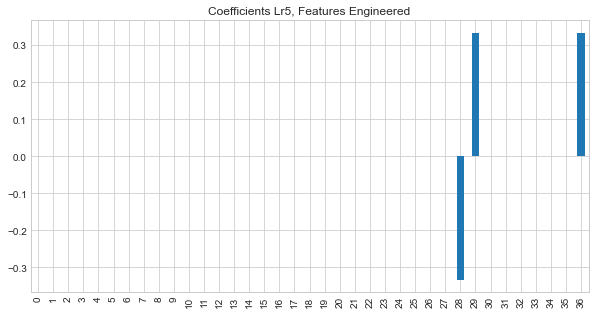

In [72]:
pd.Series(lr5.coef_).plot(kind="bar", title="Coefficients Lr5, Features Engineered",figsize=(10,5))

In [73]:
# Verify that index values match in both datasets
# We expect to see the same number of rows in X_train as the sum value
X_train.shape[0] == sum(X_train.index == y_train.index)

True

In [74]:
# Model
lr6 = LinearRegression()

lr6.fit(X_train, y_train)
lr6.score(X_test, y_test)

1.0

## Percent Decrease in the Cost Function

In [75]:
delta_mse = ((res1['MSE']- res5['MSE'])/res1['MSE'])*100
delta_mae = ((res1['MAE']- res5['MAE'])/res1['MAE'])*100
delta_rmse = ((res1['RMSE']- res5['RMSE'])/res1['RMSE'])*100

delta_ls = [round(delta_mse), round(delta_mae), round(delta_rmse)]
delta_ls2 = ["MSE % decrease", "MAE % decrease", "RMSE % decrease"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        
    

MSE % decrease: 100
MAE % decrease: 100
RMSE % decrease: 100


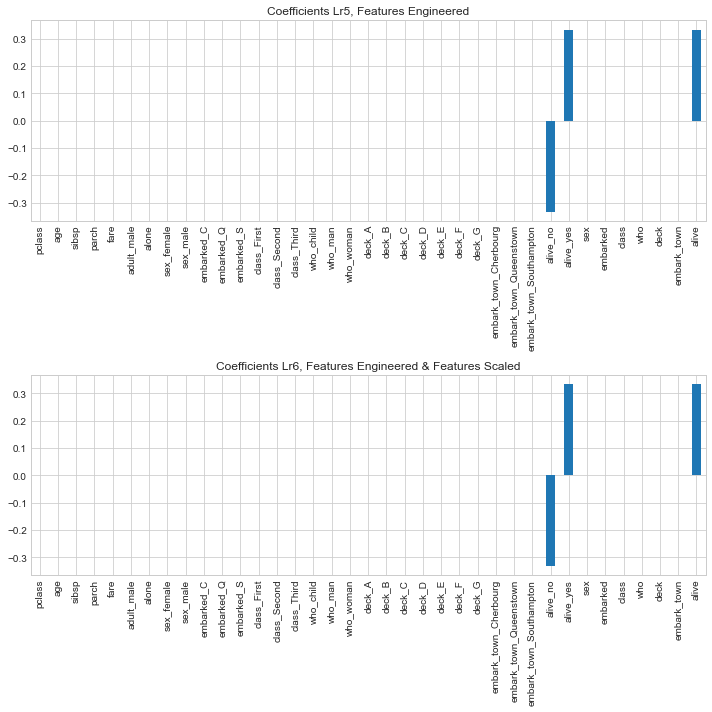

In [76]:
# plot results between scaled and unscaled

fig, ax = plt.subplots(2,1)

pd.Series(lr5.coef_).plot(
    kind="bar",
    title="Coefficients Lr5, Features Engineered",
    ax=ax[0]
)


pd.Series(lr6.coef_).plot(
    kind="bar", 
    title="Coefficients Lr6, Features Engineered & Features Scaled",
    ax=ax[1],
    figsize=(10,10)
)

ax[0].set_xticklabels(X_train.columns)
ax[1].set_xticklabels(X_train.columns)
plt.tight_layout()

In [77]:
# Used for saving out models
import joblib
import seaborn as sns
import datetime

In [78]:
# Save the model as todays date

# Todays date as string
today = str(datetime.datetime.today())[:10].replace("-", "_")

joblib.dump(scaler, f"./models/scaler_{today}")
joblib.dump(one_hot, f"./models/one_hot_{today}")
joblib.dump(ordinal, f"./models/ordinal_{today}")
joblib.dump(lr6, f"./models/model_{today}")

['./models/model_2022_01_25']

In [79]:
# Load the model
jl_scaler = joblib.load(f"./models/scaler_{today}")
jl_one_hot = joblib.load(f"./models/one_hot_{today}")
jl_ordinal = joblib.load(f"./models/ordinal_{today}")
jl_model = joblib.load(f"./models/model_{today}")

In [80]:
# Column names for one hot and ordinal encoder
col_names_one_hot = ["sex","embarked","class","who","deck","embark_town","alive"]
col_names_ordinal = ["sex","embarked","class","who","deck","embark_town","alive"]

# Change column order to make addition of scaled features easier
col_order_ls = ['pclass','age','sibsp','parch','fare','adult_male','alone','sex_female',
                'sex_male','embark_town_Southampton','alive_no',
                'alive_yes','sex','embarked','class','who','deck','embark_town','alive']
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df


def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["sex","embarked","class","who","deck","embark_town","alive"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

def calc_cost(y_true, y_predict):
    
    "Calculate Cost Functions and print output"
    
    result_dict = {}
    
    mse = mean_squared_error(y_true, y_predict)
    mae = mean_absolute_error(y_true, y_predict)
    rmse = mean_squared_error(y_true, y_predict, squared=False)
    
    ls = [mse, mae, rmse]
    ls2 = ["MSE", "MAE", "RMSE"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

In [81]:
jl_model.score(X_test, y_test)

1.0

In [82]:
# Compare with actual model
# Should have this model in memory, if not then run the code for the model above
lr6.score(X_test, y_test)

1.0

In [83]:
# Check to see exact predictions are being made for reproducibiblity
sum(jl_model.predict(X_test) == lr6.predict(X_test))

179

In [84]:
X_test.shape

(179, 37)

In [85]:
print("Loaded Model")
loaded_preds = jl_model.predict(X_test)
res6 = calc_cost(y_test, loaded_preds)
print("\nLinear Regression 6")
calc_cost(y_test, lr6.predict(X_test));

Loaded Model
MSE: 7.050292848269682e-29
MAE: 5.969154407258384e-15
RMSE: 8.396602198669222e-15

Linear Regression 6
MSE: 7.050292848269682e-29
MAE: 5.969154407258384e-15
RMSE: 8.396602198669222e-15


In [86]:
res0

{'MSE': 0.23791059158166486,
 'MAE': 0.4758211831633297,
 'RMSE': 0.4877607934035544}

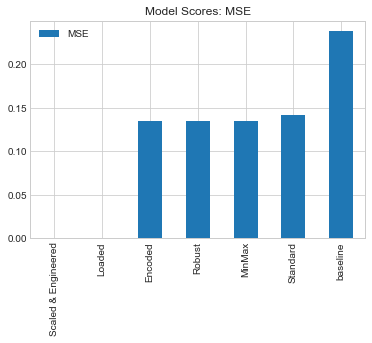

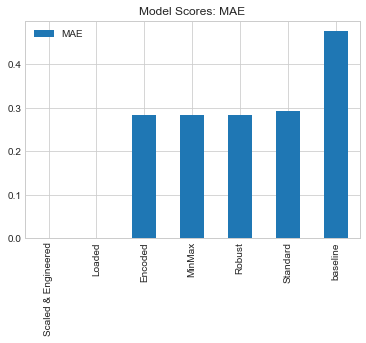

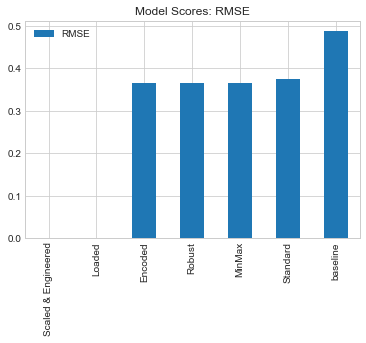

In [87]:
model_ls = ["baseline", "Standard", "Robust", "MinMax", "Encoded", "Scaled & Engineered", "Loaded"]
result_ls = [res0, res1, res2, res3, res4, res5, res6]

res_df = pd.DataFrame(result_ls, index=model_ls)

for x in ["MSE", "MAE", "RMSE"]:
    res_df.loc[:,res_df.columns == x].sort_values(by=x).plot(kind="bar", title=f"Model Scores: {x}")

In [88]:
res_df

,MSE,MAE,RMSE
baseline,2.379106e-01,4.758212e-01,4.877608e-01
Standard,1.416388e-01,2.921472e-01,3.763493e-01
Robust,1.344479e-01,2.828941e-01,3.666713e-01
MinMax,1.344479e-01,2.828941e-01,3.666713e-01
Encoded,1.344479e-01,2.828941e-01,3.666713e-01
Scaled & Engineered,7.050293e-29,5.969154e-15,8.396602e-15
Loaded,7.050293e-29,5.969154e-15,8.396602e-15
